In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import preprocess_input,VGG16
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from PIL import ImageFont
import tensorflow as tf
from tensorflow import keras
from keras.layers import Rescaling
from sklearn.preprocessing import LabelEncoder

In [64]:
len(os.listdir("UTKFace"))

23708

In [65]:
images_list = os.listdir("UTKFace")

In [66]:
df = pd.DataFrame({"images_list": images_list})
df.head()

images_list
0  54_0_0_20170117170958924.jpg.chip.jpg
1   3_1_0_20170109192434126.jpg.chip.jpg
2  26_0_2_20170116180203819.jpg.chip.jpg
3  16_0_0_20170110231520320.jpg.chip.jpg
4  59_0_0_20170109011033488.jpg.chip.jpg

In [67]:
df["age"] = df["images_list"].apply(lambda x: x.split("_")[0])

In [68]:
df.head()

images_list age
0  54_0_0_20170117170958924.jpg.chip.jpg  54
1   3_1_0_20170109192434126.jpg.chip.jpg   3
2  26_0_2_20170116180203819.jpg.chip.jpg  26
3  16_0_0_20170110231520320.jpg.chip.jpg  16
4  59_0_0_20170109011033488.jpg.chip.jpg  59

In [69]:
df.age = df.age.astype(int)

<Axes: ylabel='Frequency'>

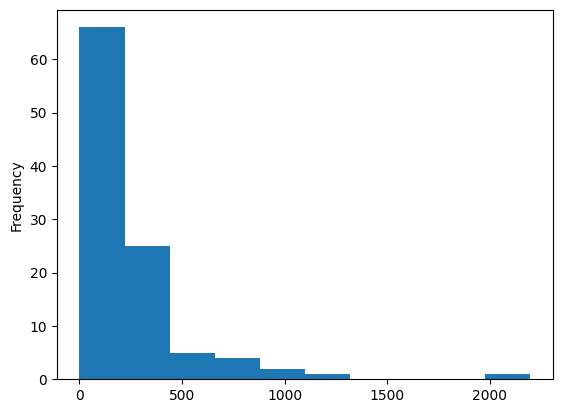

In [70]:
df.age.value_counts().plot.hist()

In [71]:
df2 = df[df["age"] >= 10]
df2.head()

images_list  age
0  54_0_0_20170117170958924.jpg.chip.jpg   54
2  26_0_2_20170116180203819.jpg.chip.jpg   26
3  16_0_0_20170110231520320.jpg.chip.jpg   16
4  59_0_0_20170109011033488.jpg.chip.jpg   59
5  36_1_0_20170117005907450.jpg.chip.jpg   36

In [72]:
df2.head()

images_list  age
0  54_0_0_20170117170958924.jpg.chip.jpg   54
2  26_0_2_20170116180203819.jpg.chip.jpg   26
3  16_0_0_20170110231520320.jpg.chip.jpg   16
4  59_0_0_20170109011033488.jpg.chip.jpg   59
5  36_1_0_20170117005907450.jpg.chip.jpg   36

In [76]:
df2["gender"] = df2["images_list"].apply(lambda x: x.split("_")[1]).copy()
df2.head()

/tmp/ipykernel_2190285/878772872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["gender"] = df2["images_list"].apply(lambda x: x.split("_")[1]).copy()


images_list  age gender
0  54_0_0_20170117170958924.jpg.chip.jpg   54      0
2  26_0_2_20170116180203819.jpg.chip.jpg   26      0
3  16_0_0_20170110231520320.jpg.chip.jpg   16      0
4  59_0_0_20170109011033488.jpg.chip.jpg   59      0
5  36_1_0_20170117005907450.jpg.chip.jpg   36      1

In [77]:
df2.gender = df2.gender.astype(int)

/tmp/ipykernel_2190285/793514899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.gender = df2.gender.astype(int)


In [78]:
df2.gender.value_counts()

gender
0    10944
1     9702
Name: count, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   images_list  23708 non-null  object
 1   age          23708 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 370.6+ KB


In [30]:
import shutil

os.mkdir("dataset2")

In [31]:
os.mkdir("dataset2/train")
os.mkdir("dataset2/test")
os.mkdir("dataset2/train/male")
os.mkdir("dataset2/train/female")
os.mkdir("dataset2/test/male")
os.mkdir("dataset2/test/female")

In [34]:
df2.head()

images_list  age gender
0  54_0_0_20170117170958924.jpg.chip.jpg   54      0
2  26_0_2_20170116180203819.jpg.chip.jpg   26      0
3  16_0_0_20170110231520320.jpg.chip.jpg   16      0
4  59_0_0_20170109011033488.jpg.chip.jpg   59      0
5  36_1_0_20170117005907450.jpg.chip.jpg   36      1

In [82]:
m,f = 0, 0
for label, image in df2[["gender","images_list"]].values:
    if label == 0:
        m += 1
        shutil.move(f"UTKFace/{image}", "dataset2/train/male")
    elif label == 1:
        f += 1
        shutil.move(f"UTKFace/{image}", "dataset2/train/female")

In [83]:
m, f

(10944, 9702)

In [3]:
IMG_SIZE = (224, 224) 
train_dir = "dataset2/train"
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", 
                                                                            batch_size=32,
                                                                            seed=32
                                                                            ) 

Found 20646 files belonging to 2 classes.


I0000 00:00:1732168838.688958  407377 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-21 06:00:38.857051: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
class_names = train_data.class_names
class_names

['female', 'male']

In [88]:
base_model = tf.keras.applications.VGG16(include_top=False, weights="imagenet")

base_model.trainable = False

data_aug = tf.keras.models.Sequential([Rescaling(1/255)])

inputs = tf.keras.layers.Input((224,224,3), name="input_layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

outputs = Dense(len(class_names), activation="sigmoid", name="output_layer")(x)

vggface_model = tf.keras.models.Model(inputs, outputs)

vggface_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [90]:
vggface_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
vggface_model.fit(train_data, steps_per_epoch=len(train_data), epochs=16)

Epoch 1/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 900s 1s/step - accuracy: 0.7537 - loss: 0.7708
Epoch 2/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/16


2024-09-22 07:48:32.384871: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


646/646 ━━━━━━━━━━━━━━━━━━━━ 887s 1s/step - accuracy: 0.8822 - loss: 0.3133
Epoch 4/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/16


2024-09-22 08:03:19.879989: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


646/646 ━━━━━━━━━━━━━━━━━━━━ 894s 1s/step - accuracy: 0.8919 - loss: 0.2795
Epoch 6/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 893s 1s/step - accuracy: 0.8929 - loss: 0.2684
Epoch 8/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/16


2024-09-22 08:33:06.135376: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


646/646 ━━━━━━━━━━━━━━━━━━━━ 894s 1s/step - accuracy: 0.8959 - loss: 0.2644
Epoch 10/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 897s 1s/step - accuracy: 0.8974 - loss: 0.2600
Epoch 12/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 896s 1s/step - accuracy: 0.8959 - loss: 0.2611
Epoch 14/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 895s 1s/step - accuracy: 0.8967 - loss: 0.2591
Epoch 16/16
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


2024-09-22 09:32:47.271048: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [6]:
def plot_and_predict(image_path, model):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, (224,224))
    # img = img / 255
    preprocesed_img = tf.expand_dims(img, axis=0)
    pred = model.predict(preprocesed_img)
    idx = tf.argmax(pred[0])
    prob = pred[0][idx] * 100
    class_name = class_names[idx]
    plt.imshow(img/255)
    plt.title(f"Prediction: {class_name}   Probability: {prob:.2f}%")
    plt.axis(False)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


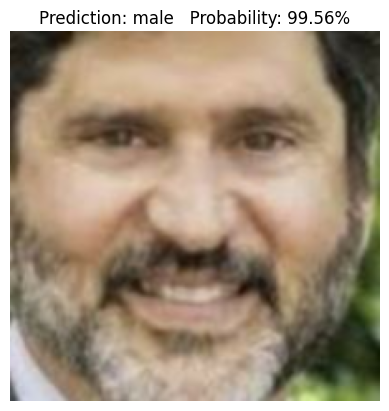

47_0_4_20170104210443652.jpg.chip.jpg


In [36]:
vgg_model = tf.keras.models.load_model("gender_classification_vgg16.keras")
test_images = os.listdir("utkface_aligned_cropped/crop_part1")
random_img = random.choice(test_images)
plot_and_predict(f"utkface_aligned_cropped/crop_part1/{random_img}", vgg_model)
print(random_img)

In [55]:
def plot_multiple_images_and_predict(images_list, image_path, model):
    plt.figure(figsize=(12, 10))
    for i, img in enumerate(images_list):
        img_path = os.path.join(image_path, img)
        img = tf.io.read_file(img_path)
        img = tf.io.decode_image(img)
        img = tf.image.resize(img, (224,224))
        # img = img / 255
        preprocesed_img = tf.expand_dims(img, axis=0)
        pred = model.predict(preprocesed_img)
        idx = tf.argmax(pred[0])
        prob = pred[0][idx] * 100
        class_name = class_names[idx]
        plt.subplot(4,3,i+1)        
        plt.imshow(img/255)
        plt.title(f"Prediction: {class_name}   Probability: {prob:.2f}%")
        plt.axis(False)
        # plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


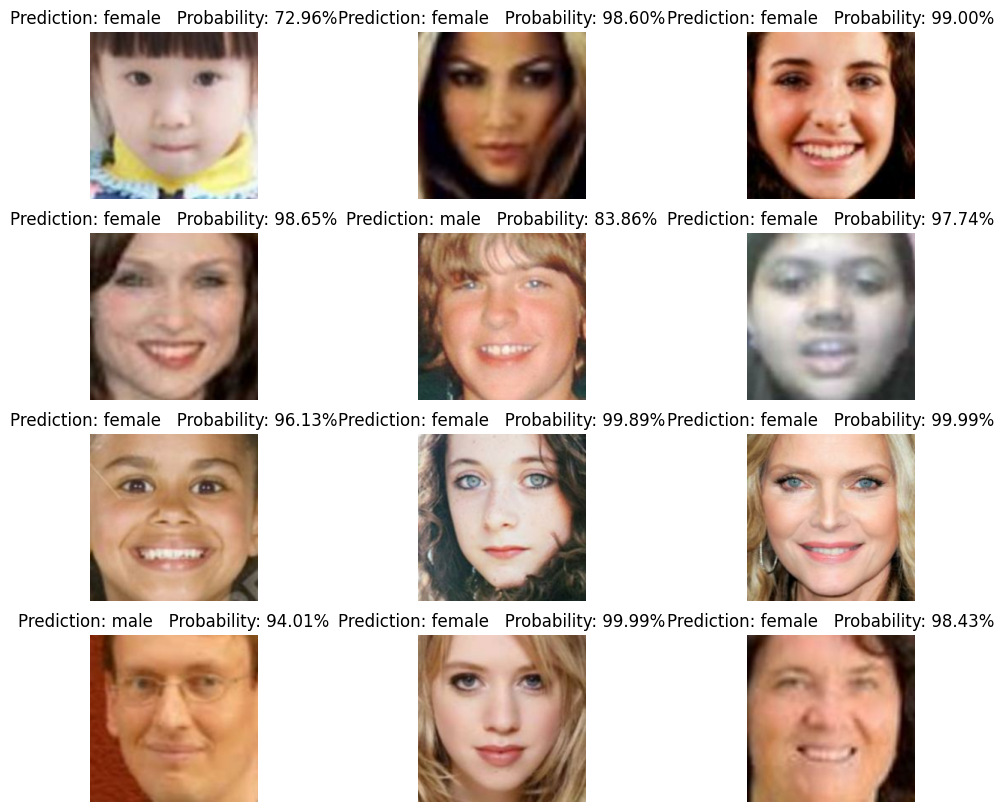

In [65]:
test_images = os.listdir("utkface_aligned_cropped/crop_part1")
plot_multiple_images_and_predict(random.sample(test_images, 12), "utkface_aligned_cropped/crop_part1", vgg_model)

In [208]:
vggface_model.save("gender_classification_vgg16.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


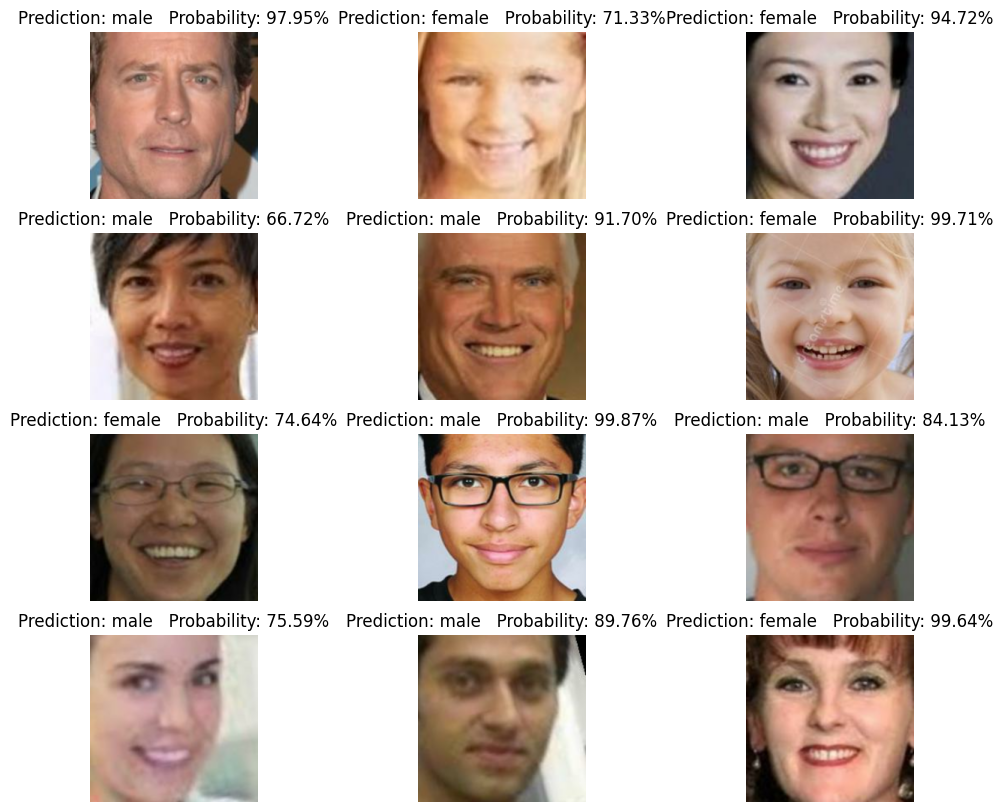

In [67]:
plot_multiple_images_and_predict(random.sample(test_images, 12), "utkface_aligned_cropped/crop_part1", vgg_model)